### Summary

Pulse shape discimination works well in argon. In fact, you can see the pulse shape difference by eye easily. The code here builds an example of that, based on values found in "Neutron to Gamma Pulse Shape Discrimination in Liquid Argon Detectors with High Quantum Effciency Photomultiplier Tubes",  https://doi.org/10.1016/j.phpro.2012.03.732

### Imports

In [1]:
import numpy as np
import scipy.special as sp
import math
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', size=22)
plt.rcParams['figure.figsize'] = (10.0, 7.0)
# For multiple axes in one fig
from matplotlib import gridspec 
# For TeX fonts
plt.rc('text', usetex=True)

### Settings

In [2]:
tauT = 1450 # ns, 1.3 - 1.6 us according to WARP
tauS = 5.5

LY = 6.35# phe/keV±
prompt = 120 # ns

fprompt_er = 0.3
fprompt_nr = 0.65 # Values read from fig. 7 for 50 keV
E = 50

# fprompt_er = 0.25
# fprompt_nr = 0.8
# E = 100

### Functions

In [3]:
import matplotlib as mpl
def draw_box(x, y, **kwargs):
    """Draw rectangle, given x-y boundary tuples"""
    # Arcane syntax of the week: matplotlib's Rectangle...
    plt.gca().add_patch(mpl.patches.Rectangle(
        (x[0], y[0]), x[1] - x[0], y[1] - y[0], **kwargs))

In [4]:
def single_pe(t, t0, tau):
    return np.concatenate([np.zeros(np.sum(t < t0)), np.exp(-(t[t>=t0] - t0) / tau)])
    # return np.exp(-(t - t0) / tau) * (t > t0)

In [5]:
def simpulse(t, fS, nph, tau, jitter):
    nph = np.int(nph)
    nS = np.int(fS * nph)
    nT = nph - nS
    
    timesS = np.random.exponential(scale=tauS, size = nS)
    timesT = np.random.exponential(scale=tauT, size = nT)
    times = np.concatenate([timesS, timesT])
    times += np.random.normal(0, jitter, nph)
    ys = np.zeros(len(t))
    for time in times:
        ys = ys + single_pe(t, time, tau)
        
    return ys

### Simulate waveforms

In [6]:
t = np.linspace(-300, 4000, 2151)
y_er = simpulse(t, fprompt_er, E * LY, 10, 20)
y_nr = simpulse(t, fprompt_nr, E * LY, 10, 20)

### Plots

#### Simple

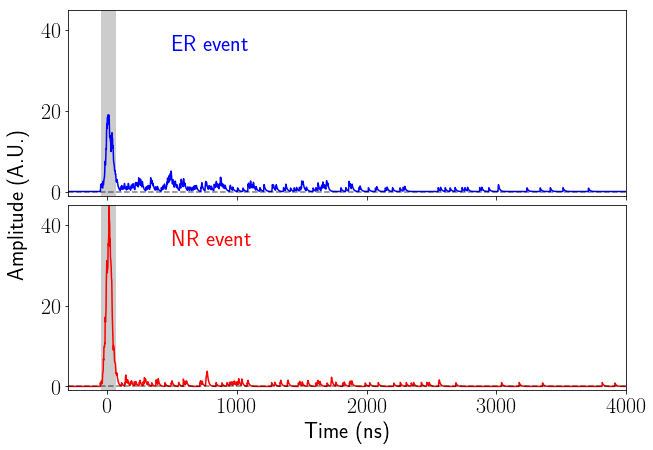

In [7]:
tmax = 4000
ymax = 45

plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(-1, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'ER event', color='blue')
plt.xlim(-300, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(-1,ymax)
plt.xlim(-300, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(500, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
plt.savefig('plots/argon_waveform_option2.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform_option2.png', bbox_inches='tight')
plt.show()

#### Fancy box

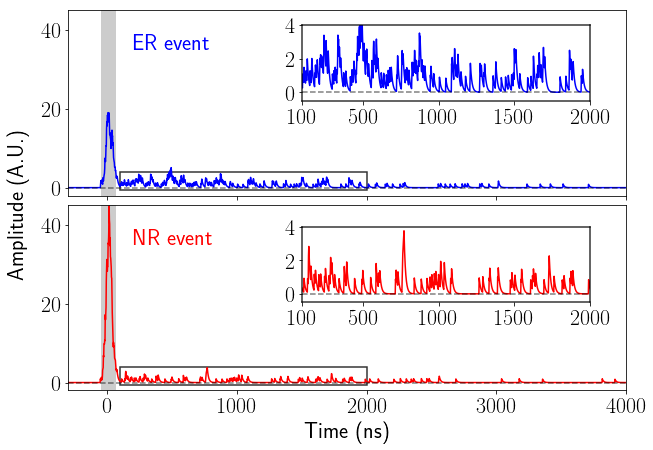

In [8]:
tmax = 4000
ymax = 45
ymin = -2

box_lw = 1.5
xbox = (100, 2000)
ybox = (-0.5, 4)

fig = plt.figure(figsize = (10, 7))
gs = gridspec.GridSpec(2, 1, hspace = 0.05, wspace = 0.05) #width_ratios=[1,1,0.05], hspace=-50) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])
plt.sca(ax0)
plt.plot(t, y_er, color='blue')
# plt.ylim(-2, 45)
plt.ylim(ymin, ymax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(200, 35, 'ER event', color='blue')
plt.xlim(-300, tmax)
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')
ax0.axes.xaxis.set_ticklabels([])

draw_box(xbox, ybox, edgecolor='black', facecolor = 'None', lw=box_lw, alpha = 0.8)
box0 = fig.add_axes([0.45, 0.7, 0.4, 0.15])
plt.sca(box0)
plt.plot(t, y_er, color='blue')
plt.xlim(*xbox)
plt.ylim(*ybox)
plt.axhline(0, color='black', alpha=0.5,ls='--')



# plt.xticks([])

plt.sca(ax1)
plt.plot(t, y_nr, color='red')
plt.ylim(ymin,ymax)
plt.xlim(-300, tmax)
plt.axhline(0, color='black', alpha=0.5,ls='--')
plt.text(200, 35, 'NR event', color='red')
plt.ylabel('Amplitude (A.U.)')
ax1.yaxis.set_label_coords(-0.07, 1)
plt.xlabel('Time (ns)')
draw_box((-50, 70), (-10, 100), alpha = 0.2, facecolor='black', edgecolor='None')


draw_box(xbox, ybox, edgecolor='black', facecolor = 'None', lw=box_lw, alpha = 0.8)
box1 = fig.add_axes([0.45, 0.3, 0.4, 0.15])
plt.sca(box1)
plt.plot(t, y_nr, color='red')
plt.xlim(*xbox)
plt.ylim(*ybox)
plt.axhline(0, color='black', alpha=0.5,ls='--')

for ax in [box0, box1]:
    plt.sca(ax)
    plt.xticks([xbox[0], 500, 1000, 1500, 2000])
    plt.yticks([0, 2, 4])
    for spinelabel in ['top', 'bottom', 'left', 'right']:
        spine = ax.spines[spinelabel]
        spine.set_lw(box_lw)
        spine.set_alpha(0.8)


plt.savefig('plots/argon_waveform.pdf', bbox_inches='tight')
plt.savefig('plots/argon_waveform.png', bbox_inches='tight')
plt.show()